In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [2]:
ho=pd.read_csv('DS2_C5_S6_KCHouse_Data_Practice.csv')
ho2=ho.copy()

In [3]:
ho.drop('id',axis=1)
ho.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Task 1: Data Preparation and Splitting

In [4]:
ho.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
ho.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
ho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
ho['date']=ho['date'].str[0:8]
ho['date'].astype(int)

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: int32

<AxesSubplot:>

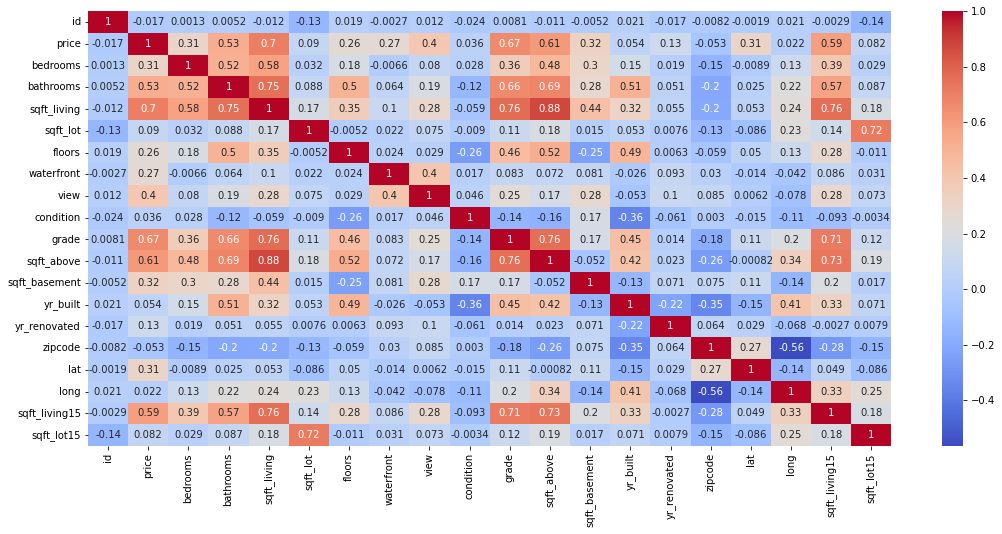

In [8]:
plt.figure(figsize=(18,8))
sns.heatmap(ho.corr(),cmap='coolwarm',annot=True)

In [9]:
X=ho.drop(['id','price','lat','long'],axis=1)
y=np.array(ho['price'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=88)

In [11]:
model41=DecisionTreeRegressor()
model43=SVR()

In [12]:
model41.fit(X_train,y_train)
model43.fit(X_train,y_train)

SVR()

In [13]:
model41_train_pred = model41.predict(X_train)
model43_train_pred = model43.predict(X_train)

In [14]:
model4_train_X = {'DTR':model41_train_pred,'SVR':model43_train_pred}
model4_train_X = pd.DataFrame(model4_train_X)
model4_train_X

,DTR,SVR
0,357500.0,449999.862722
1,190000.0,449999.865454
2,1169000.0,449999.866895
3,365000.0,449999.863781
4,385000.0,449999.863992
...,...,...
15124,184000.0,449999.864332
15125,680200.0,449999.863111
15126,236500.0,449999.862521
15127,310000.0,449999.865416


In [15]:
model41_test_pred = model41.predict(X_test)
model43_test_pred = model43.predict(X_test)

In [16]:
model4_test_X = {'DTR':model41_test_pred,'SVR':model43_test_pred}
model4_test_X = pd.DataFrame(model4_test_X)
model4_test_X

,DTR,SVR
0,655000.0,449999.862508
1,250000.0,449999.861753
2,315000.0,449999.861878
3,315000.0,449999.899526
4,399000.0,449999.864453
...,...,...
6479,274800.0,449999.861223
6480,210000.0,449999.863659
6481,305000.0,449999.883423
6482,289900.0,449999.863814


In [17]:
model1=LinearRegression(normalize=True)
model2=RandomForestRegressor(n_estimators=100,max_depth=5,n_jobs=-1,random_state=88,oob_score=True)
model3=ada = AdaBoostRegressor(n_estimators=10,learning_rate=1.0,random_state =88)
model4=LinearRegression(normalize=True)

In [18]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(model4_train_X,y_train)

LinearRegression(normalize=True)

In [19]:
print(model1.__class__.__name__,model1.score(X_train,y_train))
print(model2.__class__.__name__,model2.score(X_train,y_train))
print(model3.__class__.__name__,model3.score(X_train,y_train))
print('Model stacking using Logistic Regression with DTR and SVR',model4.score(model4_train_X,y_train))

LinearRegression 0.6519728722906863
RandomForestRegressor 0.740483407621578
AdaBoostRegressor 0.6160207590904945
Model stacking using Logistic Regression with DTR and SVR 1.0


In [20]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)
y_pred4=model4.predict(model4_test_X)

In [21]:
print(model1.__class__.__name__,model1.score(X_test,y_test))
print(model2.__class__.__name__,model2.score(X_test,y_test))
print(model3.__class__.__name__,model3.score(X_test,y_test))
print('Model stacking using Logistic Regression with DTR and SVR',model4.score(model4_test_X,y_test))

LinearRegression 0.6612879276628494
RandomForestRegressor 0.7172076432695296
AdaBoostRegressor 0.5972307276130202
Model stacking using Logistic Regression with DTR and SVR 0.6473709512016452


In [22]:
modelcomp={'Model_Name':[model1.__class__.__name__,model2.__class__.__name__,model3.__class__.__name__,'Stacking-Linear(DTR,SVR)'],
           'Training_Score':[model1.score(X_train,y_train),model2.score(X_train,y_train),model3.score(X_train,y_train),model4.score(model4_train_X,y_train)],
          'Testing_Score':[model1.score(X_test,y_test),model2.score(X_test,y_test),model3.score(X_test,y_test),model4.score(model4_test_X,y_test)]}

In [23]:
modelcompdf=pd.DataFrame(modelcomp)
modelcompdf

,Model_Name,Training_Score,Testing_Score
0,LinearRegression,0.651973,0.661288
1,RandomForestRegressor,0.740483,0.717208
2,AdaBoostRegressor,0.616021,0.597231
3,"Stacking-Linear(DTR,SVR)",1.000000,0.647371
